## Car Advertisement Analysis

This project will be examining a car advertisement dataset and analyzing it to provide relevant takeaways backed up by plots and histograms. 

In [44]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [45]:
# Read the data
df = pd.read_csv('../vehicles_us.csv')
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

Creating a bar plot of the number of vehicle types per manufacturer. 

In [46]:
# Plot vehicle types by manufacturer
fig1 = px.histogram(df, x='manufacturer', color='type')
fig1.show()


Creating a histogram of the condition of each vehicle v. the model year:

In [47]:
# Plot histogram of condition vs model_year
fig2 = px.histogram(df, x='model_year', color='condition')
fig2.show()

Interestingly, most vehicles being advertised are new, excellent or salvage conditions. New and excellent are expected, but salvage is a little surprising. 

Creating histogram of price distribution for Hyundai v. Chevrolet:

In [48]:
# Plot price distribution between manufacturers
manufac_list = sorted(df['manufacturer'].unique())
manufacturer_1 = 'chevrolet'  # Replace with your desired manufacturer
manufacturer_2 = 'hyundai'    # Replace with your desired manufacturer

In [49]:
mask_filter = (df['manufacturer'] == manufacturer_1) | (df['manufacturer'] == manufacturer_2)
df_filtered = df[mask_filter]

In [50]:
normalize = True  # Adjust as needed
histnorm = 'percent' if normalize else None

In [51]:
fig3 = px.histogram(df_filtered, x='price', nbins=30, color='manufacturer', histnorm=histnorm, barmode='overlay')
fig3.show()

## Analyzing Honda v. Toyota

I have a theory that Hondas and Toyotas are very similar

Creating plot comparing prices between Hondas and Toyotas based on model year:

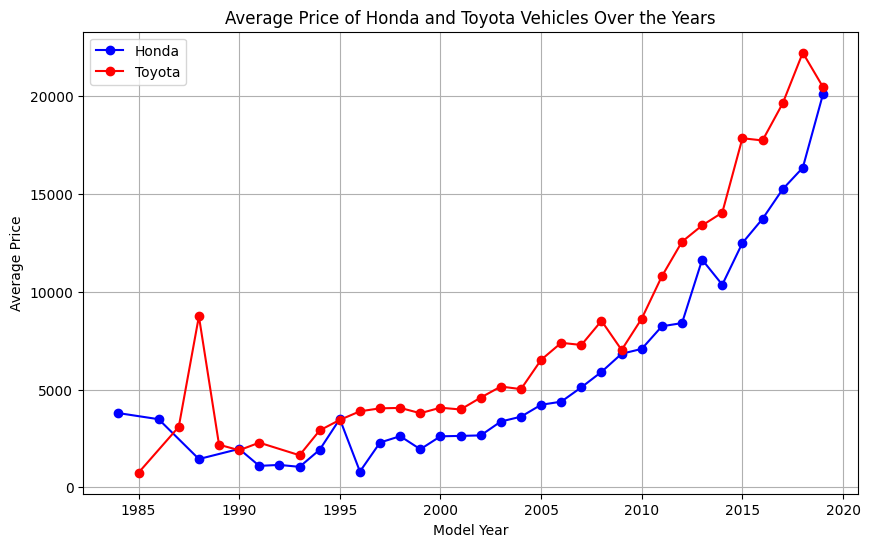

In [52]:
# Assuming df is your DataFrame containing the data
# Filter data for Honda and Toyota
honda_data = df[df['manufacturer'] == 'honda']
toyota_data = df[df['manufacturer'] == 'toyota']

# Calculate average price for each model year
honda_avg_price = honda_data.groupby('model_year')['price'].mean()
toyota_avg_price = toyota_data.groupby('model_year')['price'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(honda_avg_price.index, honda_avg_price.values, label='Honda', marker='o', color='blue')
plt.plot(toyota_avg_price.index, toyota_avg_price.values, label='Toyota', marker='o', color='red')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.title('Average Price of Honda and Toyota Vehicles Over the Years')
plt.legend()
plt.grid(True)
plt.show()

Interestingly, this data seems to imply that from model year 1990 and newer, the average price of a Toyota being advertised is always slightly higher than the average price of a Toyota being advertised. 

Next I'd like to examine how long these cars have been advertised without being sold on average (based on model year as well). 

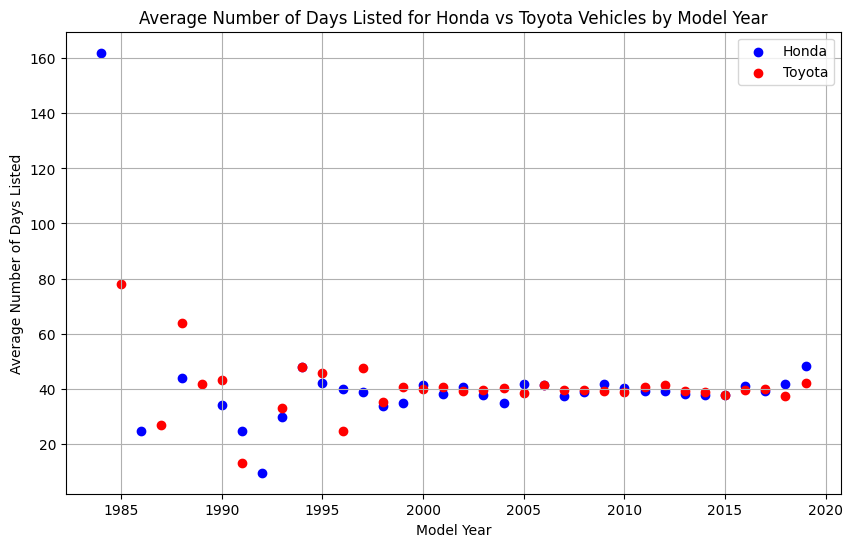

In [53]:
# Calculate number of days listed for each model year
honda_days_listed = honda_data.groupby('model_year')['days_listed'].mean()
toyota_days_listed = toyota_data.groupby('model_year')['days_listed'].mean()

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(honda_days_listed.index, honda_days_listed.values, label='Honda', color='blue')
plt.scatter(toyota_days_listed.index, toyota_days_listed.values, label='Toyota', color='red')

plt.xlabel('Model Year')
plt.ylabel('Average Number of Days Listed')
plt.title('Average Number of Days Listed for Honda vs Toyota Vehicles by Model Year')
plt.legend()
plt.grid(True)
plt.show()

It seems that for cars of model year 2000 or later, the number of days listed (without being sold yet) are nearly identical between Honda and Toyota. 

Lastly, I want to take a look at the relationship between number of miles and model year for the two companies:

In [58]:
# Filter out rows with NaN values in the 'odometer' column for Honda and Toyota data
honda_data_filtered = honda_data.dropna(subset=['odometer'])
toyota_data_filtered = toyota_data.dropna(subset=['odometer'])

# Calculate average odometer reading for each model year for Honda and Toyota
honda_avg_odometer = honda_data_filtered.groupby('model_year')['odometer'].mean()
toyota_avg_odometer = toyota_data_filtered.groupby('model_year')['odometer'].mean()

# Create a DataFrame to hold the combined data
combined_data = pd.DataFrame({'Model Year': honda_avg_odometer.index,
                              'Honda Odometer': honda_avg_odometer.values,
                              'Toyota Odometer': toyota_avg_odometer.values})

# Plot the combined data
fig = px.bar(combined_data, x='Model Year', y=['Honda Odometer', 'Toyota Odometer'],
             title='Average Odometer Reading by Model Year for Honda and Toyota',
             labels={'Model Year': 'Model Year', 'value': 'Average Odometer', 'variable': 'Manufacturer'},
             barmode='group', width=800, height=500)
fig.show()